# 📊 Exploratory Data Analysis (EDA)
Welcome! This notebook explores the Kiva and World Bank data to understand loan trends, macroeconomic features, and funding success.

## 📥 Data Loading
We load the raw Kiva and World Bank datasets for analysis.

## 🧹 Data Cleaning
We'll handle missing values, drop duplicates, and format the columns.

## 🧠 Feature Engineering
Creating new columns like funding gap, percent funded, and derived time/date features.

## 📈 Data Visualization
Exploring trends by sector, gender, country, and time using seaborn and matplotlib.

## 📊 Correlation Analysis
Understand the relationships between numeric features.


# ============================================================
## 📌 PROJECT TITLE: 
#### Predicting Loan Funding Success using Socio-Economic Indicators: A Machine Learning Study Using Kiva and World Bank Data
# ============================================================

## 🎯 OBJECTIVE:
#### To analyze how social-economic factors (like rural population %, literacy rate, GNI per capita) and loan-specific features 
#### (sector, term, borrower count, gender) affect the probability of a loan getting funded on Kiva.org.
#
#### We'll also predict the success of funding using logistic regression and classification models using machine learning.
#
## 🔍 Keywords: 
#### Data Analysis, Feature Engineering,  Regression, Classification, Kiva, World Bank, Socioeconomic Data
# ------------------------------------------------------------
## 🛠️  TECH STACK:
#### Python, Pandas, Seaborn, Matplotlib, Scikit-Learn
# ------------------------------------------------------------

In [1]:


from IPython.display import Markdown, display

table_md = """
| **Dataset**        | **Description**                                                                                                                                                      |
|--------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Kiva Dataset**   | Contains microloan records from Kiva.org, including borrower details, loan amount, sector, country, repayment interval, etc. Useful for studying global microfinance patterns. |
| **World Bank Dataset** | Includes country-level socio-economic indicators like GDP per capita, literacy rate, unemployment rate, poverty levels, etc., providing macroeconomic context to the microloan data. |
"""

display(Markdown(table_md))

### 📦 Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  for date handling
from datetime import datetime

# Set default plot style
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

import os
import pandas as pd

# Define paths relative to your project folder
data_dir = "data"

kiva_path = os.path.join(data_dir, "kiva data.csv")
wb_path = os.path.join(data_dir, "world bank data.csv")

# Load datasets
kiva_df = pd.read_csv(kiva_path)
wb_df = pd.read_csv(wb_path)


# See column names
print("Kiva Columns:", kiva_df.columns.tolist())
print("World Bank Columns:", wb_df.columns.tolist())

# --- Standardize Country Names ---
country_fix = {
    "Côte d'Ivoire": "Ivory Coast",
    "Vietnam": "Viet Nam",
    "Russia": "Russian Federation",
    "Congo (Dem. Rep.)": "Congo, Dem. Rep.",
    "Congo (Rep.)": "Congo, Rep.",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Lao PDR": "Lao People's Democratic Republic"
    # Add more fixes based on unmatched rows
}
kiva_df["country"] = kiva_df["country"].replace(country_fix)

# --- Merge ---
merged_df = pd.merge(
    kiva_df,
    wb_df,
    how="left",
    left_on="country",
    right_on="Country Name"
)

# --- Create Derived Columns ---
# Funding gap
merged_df["funding_gap"] = merged_df["loan_amount"] - merged_df["funded_amount"]

# Convert date columns to datetime
for col in ["posted_time", "funded_time"]:
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# Time to fund in days
merged_df["time_to_fund"] = (merged_df["funded_time"] - merged_df["posted_time"]).dt.days



print("✅ Data merged and new columns added!")






| **Dataset**        | **Description**                                                                                                                                                      |
|--------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Kiva Dataset**   | Contains microloan records from Kiva.org, including borrower details, loan amount, sector, country, repayment interval, etc. Useful for studying global microfinance patterns. |
| **World Bank Dataset** | Includes country-level socio-economic indicators like GDP per capita, literacy rate, unemployment rate, poverty levels, etc., providing macroeconomic context to the microloan data. |


Kiva Columns: ['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'term_in_months', 'lender_count', 'tags', 'borrower_genders', 'repayment_interval', 'date']
World Bank Columns: ['Country Name', 'Country Code', 'Rural_Population_%_Total', 'Female_Labor_Force_%', 'Unemployment_Rate_%', 'Electricity_Access_%', 'GNI_per_Capita_USD']
✅ Data merged and new columns added!


In [2]:

from IPython.display import Markdown, display

# Define your Kiva + World Bank dataset columns with descriptions
kiva_columns = [
    {"Column Name": "id", "Description": "Unique identifier for each loan entry", "Unit / Format": "Integer"},
    {"Column Name": "funded_amount", "Description": "Amount that has been funded so far for the loan", "Unit / Format": "USD"},
    {"Column Name": "loan_amount", "Description": "Total loan amount requested by the borrower", "Unit / Format": "USD"},
    {"Column Name": "activity", "Description": "Specific activity for which the loan is intended", "Unit / Format": "Text (e.g., Farming, Retail)"},
    {"Column Name": "sector", "Description": "Broad sector classification for the loan", "Unit / Format": "Text (e.g., Agriculture, Education)"},
    {"Column Name": "use", "Description": "Detailed explanation of how the loan will be used", "Unit / Format": "Text"},
    {"Column Name": "country_code", "Description": "ISO Alpha-2 country code", "Unit / Format": "Text (e.g., KE, PH)"},
    {"Column Name": "country", "Description": "Name of the borrower's country", "Unit / Format": "Text"},
    {"Column Name": "region", "Description": "Region or locality within the country", "Unit / Format": "Text"},
    {"Column Name": "currency", "Description": "Currency in which the loan was disbursed", "Unit / Format": "Text (e.g., USD, PHP)"},
    {"Column Name": "partner_id", "Description": "Identifier of the partner managing the loan", "Unit / Format": "Integer"},
    {"Column Name": "posted_time", "Description": "Date and time the loan was posted on the platform", "Unit / Format": "Datetime (UTC)"},
    {"Column Name": "disbursed_time", "Description": "Date and time the loan was disbursed", "Unit / Format": "Datetime"},
    {"Column Name": "funded_time", "Description": "Date and time the loan was fully funded", "Unit / Format": "Datetime"},
    {"Column Name": "term_in_months", "Description": "Loan duration agreed upon in months", "Unit / Format": "Integer (Months)"},
    {"Column Name": "lender_count", "Description": "Number of people who contributed to the loan", "Unit / Format": "Integer"},
    {"Column Name": "tags", "Description": "Optional tags related to the loan (e.g., health, education)", "Unit / Format": "List/Text"},
    {"Column Name": "borrower_genders", "Description": "Gender(s) of borrower(s)", "Unit / Format": "Text (e.g., male, female, both)"},
    {"Column Name": "repayment_interval", "Description": "Repayment frequency of the loan", "Unit / Format": "Text (e.g., monthly, bullet)"},
    {"Column Name": "date", "Description": "Cleaned date column for analysis", "Unit / Format": "Date format (YYYY-MM-DD)"},
    {"Column Name": "rural_population_%_total", "Description": "Percentage of the country's population living in rural areas", "Unit / Format": "Percentage (%)"},
    {"Column Name": "female_labor_force_%", "Description": "Percentage of labor force that is female", "Unit / Format": "Percentage (%)"},
    {"Column Name": "unemployment_rate_%", "Description": "Unemployment rate in the country", "Unit / Format": "Percentage (%)"},
    {"Column Name": "electricity_access_%", "Description": "Percentage of population with access to electricity", "Unit / Format": "Percentage (%)"},
    {"Column Name": "gni_per_capita_usd", "Description": "Gross national income per capita (from World Bank)", "Unit / Format": "USD"},
    {"Column Name": "funding_gap", "Description": "Remaining amount yet to be funded", "Unit / Format": "USD"},
    {"Column Name": "time_to_fund", "Description": "Time taken for loan to be fully funded", "Unit / Format": "Float (days)"},
    {"Column Name": "funded_pct", "Description": "Proportion of loan funded (funded_amount / loan_amount)", "Unit / Format": "Ratio (0 to 1)"},
    {"Column Name": "loan_per_lender", "Description": "Average amount contributed per lender", "Unit / Format": "USD"},
    {"Column Name": "gender_count", "Description": "Number of borrowers in the loan", "Unit / Format": "Integer"},
    {"Column Name": "fully_funded", "Description": "1 if fully funded, 0 otherwise", "Unit / Format": "Binary (0/1)"},
    {"Column Name": "year", "Description": "Year extracted from posted_time", "Unit / Format": "Integer"},
    {"Column Name": "month", "Description": "Month extracted from posted_time", "Unit / Format": "Integer"},
    {"Column Name": "dayofweek", "Description": "Day of the week extracted from posted_time (0 = Monday)", "Unit / Format": "Integer (0–6)"}
]

# Build markdown table
markdown_table = "| **Column Name** | **Description** | **Unit / Format** |\n"
markdown_table += "|------------------|------------------|-------------------|\n"

for row in kiva_columns:
    markdown_table += f"| **{row['Column Name']}** | {row['Description']} | {row['Unit / Format']} |\n"

# Display it as a markdown table
display(Markdown(markdown_table))




| **Column Name** | **Description** | **Unit / Format** |
|------------------|------------------|-------------------|
| **id** | Unique identifier for each loan entry | Integer |
| **funded_amount** | Amount that has been funded so far for the loan | USD |
| **loan_amount** | Total loan amount requested by the borrower | USD |
| **activity** | Specific activity for which the loan is intended | Text (e.g., Farming, Retail) |
| **sector** | Broad sector classification for the loan | Text (e.g., Agriculture, Education) |
| **use** | Detailed explanation of how the loan will be used | Text |
| **country_code** | ISO Alpha-2 country code | Text (e.g., KE, PH) |
| **country** | Name of the borrower's country | Text |
| **region** | Region or locality within the country | Text |
| **currency** | Currency in which the loan was disbursed | Text (e.g., USD, PHP) |
| **partner_id** | Identifier of the partner managing the loan | Integer |
| **posted_time** | Date and time the loan was posted on the platform | Datetime (UTC) |
| **disbursed_time** | Date and time the loan was disbursed | Datetime |
| **funded_time** | Date and time the loan was fully funded | Datetime |
| **term_in_months** | Loan duration agreed upon in months | Integer (Months) |
| **lender_count** | Number of people who contributed to the loan | Integer |
| **tags** | Optional tags related to the loan (e.g., health, education) | List/Text |
| **borrower_genders** | Gender(s) of borrower(s) | Text (e.g., male, female, both) |
| **repayment_interval** | Repayment frequency of the loan | Text (e.g., monthly, bullet) |
| **date** | Cleaned date column for analysis | Date format (YYYY-MM-DD) |
| **rural_population_%_total** | Percentage of the country's population living in rural areas | Percentage (%) |
| **female_labor_force_%** | Percentage of labor force that is female | Percentage (%) |
| **unemployment_rate_%** | Unemployment rate in the country | Percentage (%) |
| **electricity_access_%** | Percentage of population with access to electricity | Percentage (%) |
| **gni_per_capita_usd** | Gross national income per capita (from World Bank) | USD |
| **funding_gap** | Remaining amount yet to be funded | USD |
| **time_to_fund** | Time taken for loan to be fully funded | Float (days) |
| **funded_pct** | Proportion of loan funded (funded_amount / loan_amount) | Ratio (0 to 1) |
| **loan_per_lender** | Average amount contributed per lender | USD |
| **gender_count** | Number of borrowers in the loan | Integer |
| **fully_funded** | 1 if fully funded, 0 otherwise | Binary (0/1) |
| **year** | Year extracted from posted_time | Integer |
| **month** | Month extracted from posted_time | Integer |
| **dayofweek** | Day of the week extracted from posted_time (0 = Monday) | Integer (0–6) |


In [3]:

#  CLEAN THE DATA
import pandas as pd
import numpy as np
import os

# Load merged data
data_path = os.path.join("data", "kiva_merged_worldbank.csv")
df = pd.read_csv(data_path)



# --- Drop columns with too many missing values (>40%) ---
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 40].index
df.drop(columns=cols_to_drop, inplace=True)

# --- Fill missing numeric columns with median ---
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# --- Fill missing categorical columns with mode ---
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# --- Clean column names: strip, lowercase, underscores ---
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# --- Convert date columns to datetime format ---
date_cols = [col for col in df.columns if 'date' in col or 'time' in col]
for col in date_cols:
    print(f"Sample values from {col}:")
    print(df[col].dropna().astype(str).head(3))



# --- Remove duplicates ---
df.drop_duplicates(inplace=True)
df.drop(columns=['country_name'], inplace=True)




Sample values from posted_time:
0    2014-11-26 00:51:29+00:00
1    2016-02-16 15:15:51+00:00
2    2014-01-06 11:29:18+00:00
Name: posted_time, dtype: object
Sample values from disbursed_time:
0    2015-01-07 08:00:00+00:00
1    2016-04-05 07:00:00+00:00
2    2013-12-23 08:00:00+00:00
Name: disbursed_time, dtype: object
Sample values from funded_time:
0    2014-11-26 20:07:08+00:00
1    2016-02-17 05:25:42+00:00
2    2014-01-14 15:22:09+00:00
Name: funded_time, dtype: object
Sample values from date:
0    26-11-2014
1    16-02-2016
2    06-01-2014
Name: date, dtype: object
Sample values from time_to_fund:
0    0.0
1    0.0
2    8.0
Name: time_to_fund, dtype: object


## FEATURE ENGINEERING

In [4]:



# Funded percentage
df['funded_pct'] = df['funded_amount'] / df['loan_amount']

# Loan per lender
df['loan_per_lender'] = df['loan_amount'] / (df['lender_count'] + 1)  # avoid zero division

# Number of borrowers
df['gender_count'] = df['borrower_genders'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Fully funded binary feature
df['fully_funded'] = (df['funded_pct'] == 1).astype(int)

# Time-based features (from posted_time)
if 'posted_time' in df.columns:
    df['year'] = pd.to_datetime(df['posted_time']).dt.year
    df['month'] = pd.to_datetime(df['posted_time']).dt.month
    df['dayofweek'] = pd.to_datetime(df['posted_time']).dt.dayofweek




#  *OUTLIER DETECTION AND TREATMENT (IQR Method)*

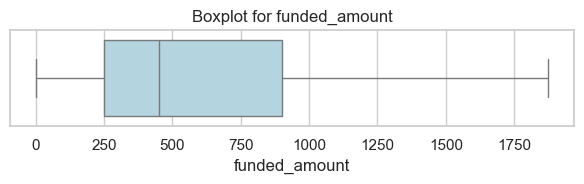

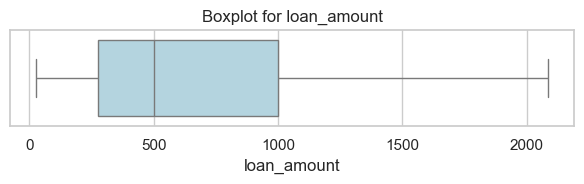

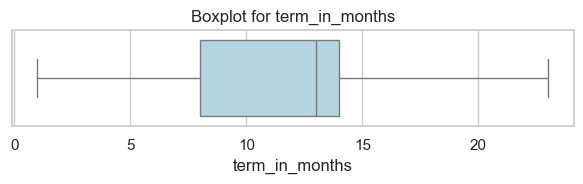

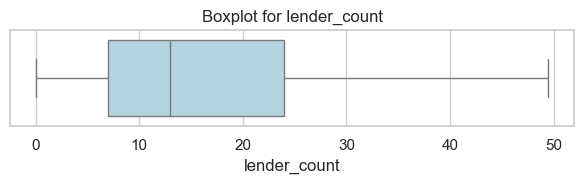

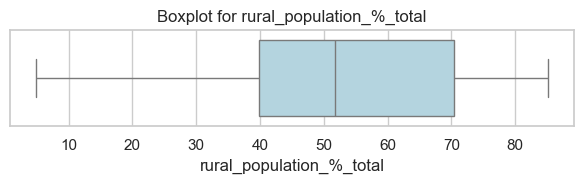

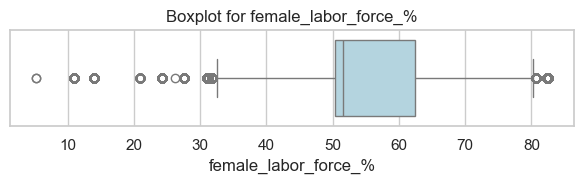

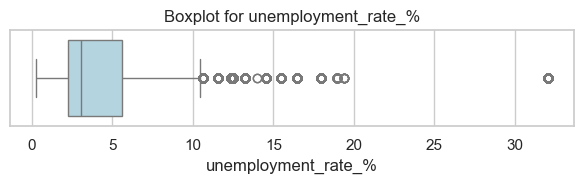

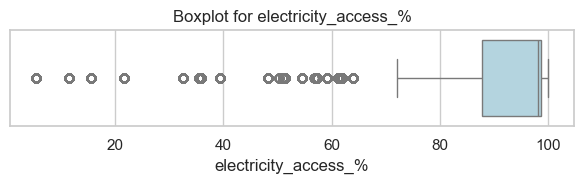

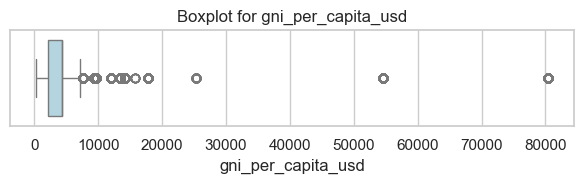

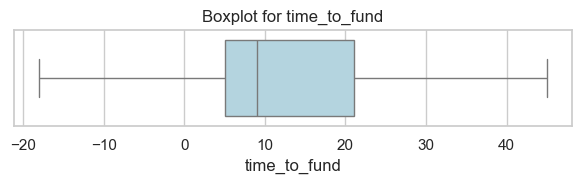

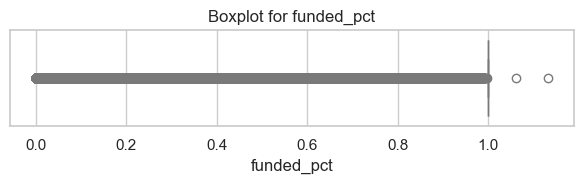

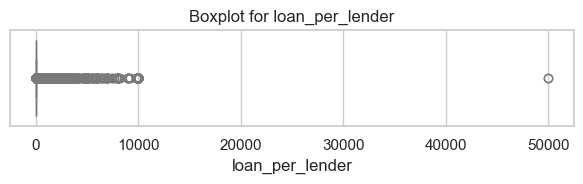

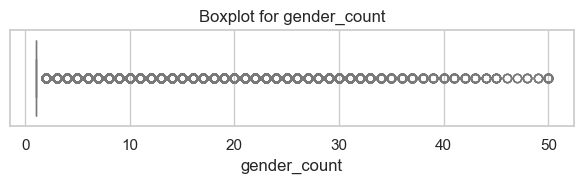

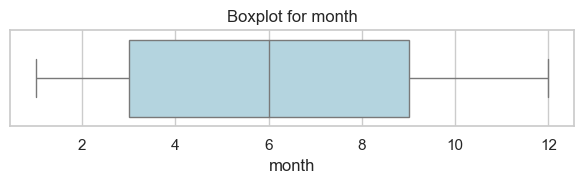

In [5]:



for col in num_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
        import matplotlib.pyplot as plt
import seaborn as sns

exclude_cols = ['id', 'partner_id']
boxplot_cols = [col for col in df.select_dtypes(include='number').columns
                if col not in exclude_cols and df[col].nunique() > 10]

for col in boxplot_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()







### INSIGHTS
##### 1. funded_amount
 *The boxplot indicates that even after capping outliers, funded amounts remain positively skewed — most loans are small, but a few are significantly larger.*
# 
##### 2. loan_amount
 *Similar to funded amount, loan amount values are skewed, suggesting that microloans dominate the dataset with occasional larger loan requests.*
# 
##### 3. term_in_months
 *Most loans are of shorter duration (under a year). There are few long-term loans, and their values have been capped using IQR, making the distribution more compact.*
# 
##### 4. lender_count
 *The distribution is still positively skewed, even after capping — few loans attract a very high number of lenders, showing popularity bias for some loans.*
# 
##### 5. rural_population_%_total
 *The boxplot shows a wide spread, indicating that Kiva loans are distributed across countries with varying levels of rural population, from very rural to urban-dominant regions.*
# 
##### 6. female_labor_force_%
 *Most countries show high female labor force participation, but there's noticeable variation, and some countries exhibit outlier values on both the lower and higher ends, even after initial outlier clipping.*
# 
##### 7. unemployment_rate_%
 *A few countries still exhibit relatively high unemployment rates, but the IQR method has removed extreme outliers, making the data more stable for modeling.*
# 
##### 8. electricity_access_%
 *Most countries have high access to electricity, and the boxplot confirms this. Variations exist, but the extremes have been handled.*
# 
##### 9. gni_per_capita_usd
 *There's a wide variation in GNI per capita, which is expected due to the global nature of the dataset. The IQR method makes the data usable for regression.*
# 
##### 10. time_to_fund
 *The time to funding varies slightly, but most loans get funded quickly. Outlier treatment removes some rare long delays in funding.*
# 
##### 11. funded_pct
 *As expected, the majority of loans are close to 100% funded. Capping has helped stabilize unusually low-funded records.*
# 
##### 12. loan_per_lender
 *Most lenders contribute small amounts, but a few contribute more. After IQR treatment, the range is more balanced.*
# 
##### 13. gender_count
 *Most loans are either for individuals or small groups. Some group loans exist, but capping has improved scale handling.*
#
##### 14. month
 *No seasonal bias is evident — loans are posted throughout the year.*

In [6]:

# FINAL CHECK

print("Final Shape of Dataset:", df.shape)
print("\nMissing Values (after cleaning):\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSample Rows:\n", df.head())




Final Shape of Dataset: (671205, 35)

Missing Values (after cleaning):
 id                          0
funded_amount               0
loan_amount                 0
activity                    0
sector                      0
use                         0
country_code                0
country                     0
region                      0
currency                    0
partner_id                  0
posted_time                 0
disbursed_time              0
funded_time                 0
term_in_months              0
lender_count                0
tags                        0
borrower_genders            0
repayment_interval          0
date                        0
country_code                0
rural_population_%_total    0
female_labor_force_%        0
unemployment_rate_%         0
electricity_access_%        0
gni_per_capita_usd          0
funding_gap                 0
time_to_fund                0
funded_pct                  0
loan_per_lender             0
gender_count                

In [7]:

# SAVE FINAL CLEANED AND FEATURED DATASET

df.to_csv("cleaned_featured_data.csv", index=False)
print("✅ Final cleaned dataset saved as 'cleaned_featured_data.csv'")




✅ Final cleaned dataset saved as 'cleaned_featured_data.csv'


### DESCRIPTIVE STATISTICS

In [8]:


# Descriptive stats for all numeric columns
print("📊 Descriptive Statistics for Numeric Columns:")
# Auto-select numeric columns
auto_num_cols = df.select_dtypes(include='number').columns

# Show descriptive statistics
print(df[auto_num_cols].describe())





📊 Descriptive Statistics for Numeric Columns:
                 id  funded_amount    loan_amount     partner_id  \
count  6.712050e+05  671205.000000  671205.000000  671205.000000   
mean   9.932486e+05     644.488539     699.262614     170.177514   
std    1.966113e+05     525.842875     578.984240      76.153789   
min    6.530470e+05       0.000000      25.000000       9.000000   
25%    8.230720e+05     250.000000     275.000000     126.000000   
50%    9.927800e+05     450.000000     500.000000     145.000000   
75%    1.163653e+06     900.000000    1000.000000     204.000000   
max    1.340339e+06    1875.000000    2087.500000     321.000000   

       term_in_months   lender_count  rural_population_%_total  \
count   671205.000000  671205.000000             671205.000000   
mean        12.710384      17.539910                 50.998820   
std          5.085654      14.235296                 18.287654   
min          1.000000       0.000000                  4.834000   
25%        

In [9]:

# Find categorical columns automatically
cat_cols = df.select_dtypes(include='object').columns

# Value counts for each categorical column
for col in cat_cols:
    print(f"\n📁 Value Counts for: {col}")
    try:
        print(df[col].value_counts(dropna=False))
    except Exception as e:
        print(f"❌ Skipping '{col}' due to error: {e}")





📁 Value Counts for: activity
activity
Farming                      72955
General Store                64729
Personal Housing Expenses    32448
Food Production/Sales        28106
Agriculture                  27023
                             ...  
Film                            13
Personal Care Products           7
Event Planning                   5
Celebrations                     5
Adult Care                       2
Name: count, Length: 163, dtype: int64

📁 Value Counts for: sector
sector
Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: count, dtype: int64

📁 Value Counts for: use
use
to buy a water filter to provide safe drinking water for their family.  

## **PLOTS**

In [10]:

def clean_gender(g):
    if pd.isna(g):
        return 'Unknown'
    g = g.lower().replace(" ", "")
    if g == 'female':
        return 'Female'
    elif g == 'male':
        return 'Male'
    elif 'female' in g and 'male' in g:
        return 'Mixed'
    else:
        return 'Other'

df['gender_cleaned'] = df['borrower_genders'].apply(clean_gender)




### *Borrower Gender Distribution*

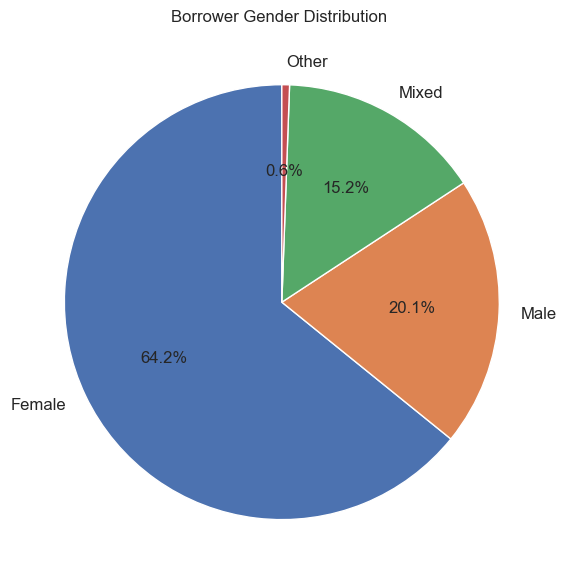

In [11]:

gender_counts = df['gender_cleaned'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12})
plt.title('Borrower Gender Distribution ')
plt.tight_layout()
plt.show()





Kiva’s significant focus on female borrowers reflects its mission to economically empower women, aligning with global development principles. Empowering women is known to have a multiplier effect, improving family health, education, and well-being, thus making it a powerful tool for sustainable poverty alleviation.

The presence of a sizable ‘Mixed’ category (15.2%) suggests group loans that include both genders—further analysis could uncover the degree of female involvement within these groups.

Overall, this gender distribution emphasizes Kiva’s role in enhancing financial inclusion and supporting women’s entrepreneurship and independence, especially in communities where they face limited access to traditional credit.



### *Loan Amount Distribution*

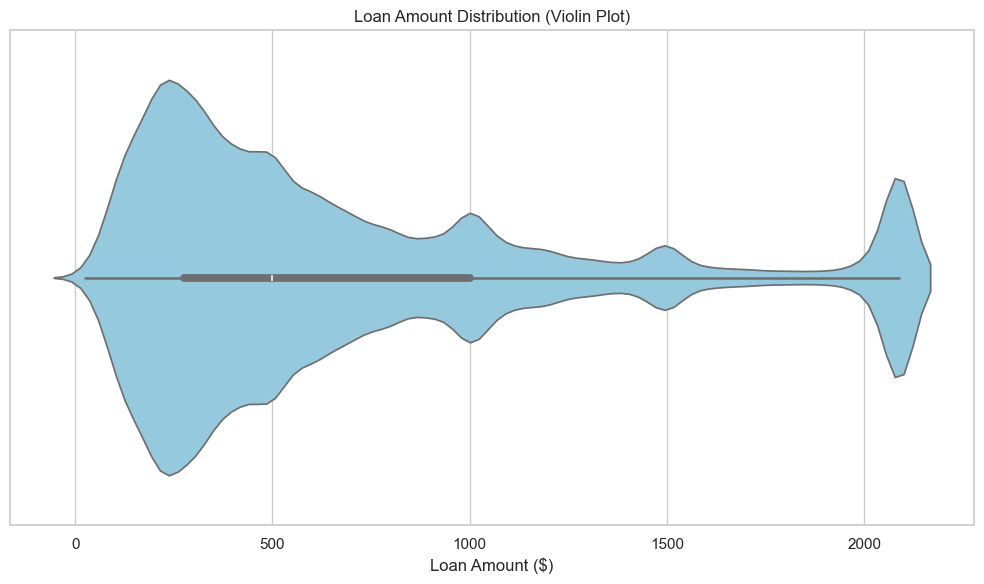

In [12]:

sns.violinplot(x=df['loan_amount'], color='skyblue')
plt.title('Loan Amount Distribution (Violin Plot)')
plt.xlabel('Loan Amount ($)')
plt.tight_layout()
plt.show()

#





The violin plot shows that the loan amount distribution is right-skewed with several outliers.

The wider section (bulge) of the plot is concentrated between $0 to approximately $500–600, indicating that the majority of loans are small in size.

Additionally, there are noticeable density bumps around $1000, $1500, and a smaller one near $2000, suggesting that certain loan types or borrower profiles may commonly request these specific amounts, even though they are less frequent compared to smaller loans.

This granular density pattern revealed by the violin plot provides a clearer view of both frequent and less frequent (but significant) clusters in the data, making it a valuable tool for understanding the distribution and structure of loan amounts.




### *Funded Amount Distribution*

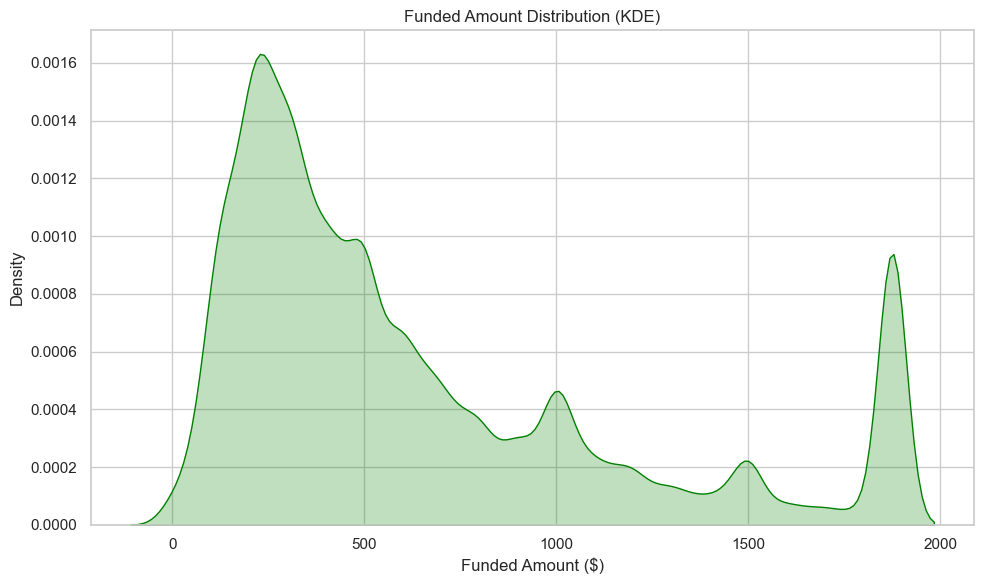

In [13]:

sns.kdeplot(df['funded_amount'], fill=True, color='green')
plt.title('Funded Amount Distribution (KDE)')
plt.xlabel('Funded Amount ($)')
plt.tight_layout()
plt.show()






This KDE plot shows the distribution of funded loan amounts on Kiva.

- **Main Peak (~$275–$300):**  
  Most loans are concentrated around this range, suggesting it’s the typical amount for small livelihood activities like farming or vending.

- **Secondary Peaks (~$750–$1000, ~$2000):**  
  These indicate clusters of medium and larger loans, possibly for group projects or more established businesses.

- **Multi-modal and Right-Skewed:**  
  The plot has multiple peaks and a long tail, showing a wide range of loan sizes with fewer large loans.

- **Closely Mirrors Loan Request Amounts:**  
  Suggests most loans are fully or nearly fully funded, highlighting the effectiveness of Kiva’s funding model.


### 📍 Loan Terms in Months (Lollipop Chart)

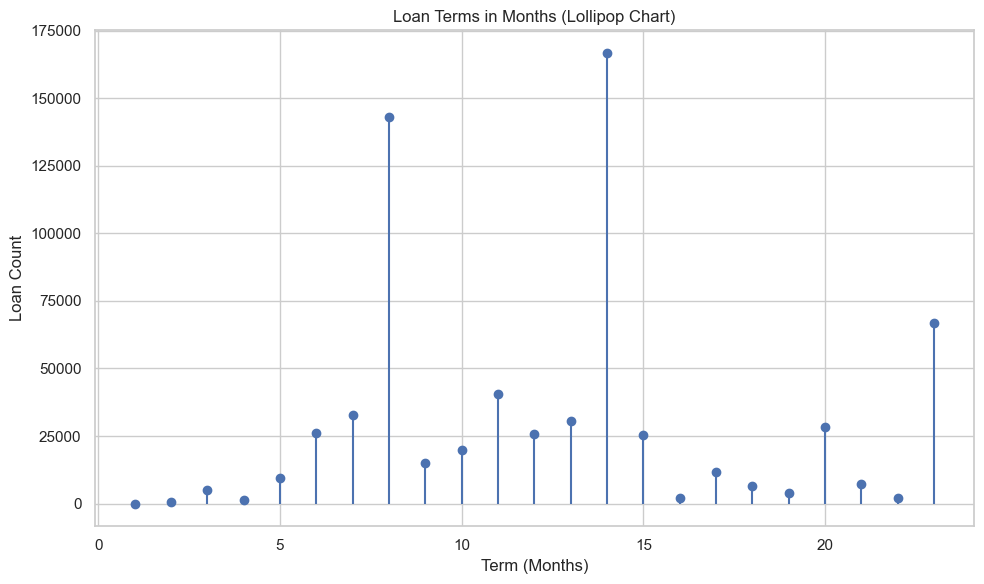

In [14]:

term_counts = df['term_in_months'].value_counts().sort_index()

plt.stem(term_counts.index, term_counts.values, basefmt=" ")
plt.title('Loan Terms in Months (Lollipop Chart)')
plt.xlabel('Term (Months)')
plt.ylabel('Loan Count')
plt.tight_layout()
plt.show()







This chart shows the distribution of repayment terms across Kiva loans.

- **Most Common Terms:**  
  8 and 14 months dominate, with over 150,000 loans each. 6 and 11 months also appear frequently (~50,000 each).

- **Aligned with Microfinance Principles:**  
  Short terms (6–14 months) match the nature of microloans — quick access to capital, low risk, and easy repayment cycles.

- **Standardized Loan Durations:**  
  The absence of every month in the range suggests Kiva uses fixed term options rather than flexible/custom durations.

- **Longer Terms Are Rare:**  
  A few loans go up to ~22 months, likely for larger or seasonal projects, but are much less frequent.


### ⏳ Cumulative Time to Fund Loans

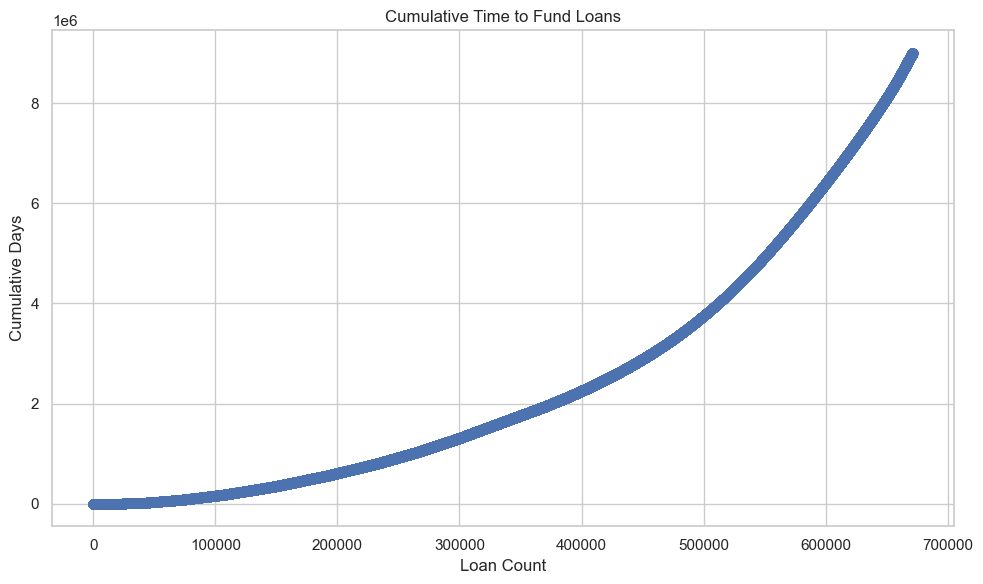

In [15]:

time_sorted = df['time_to_fund'].sort_values().reset_index(drop=True)
cumulative_time = time_sorted.cumsum()

plt.plot(cumulative_time.index, cumulative_time.values, marker='o')
plt.title('Cumulative Time to Fund Loans')
plt.xlabel('Loan Count')
plt.ylabel('Cumulative Days')
plt.tight_layout()
plt.show()






This plot shows how total funding time accumulates across all funded loans.

- **Quick Funding for Most Loans:**  
  The curve is nearly flat for the first ~300,000 loans, meaning they were funded very quickly.

- **Exponential Growth Later:**  
  After that point, the curve steepens sharply, indicating a smaller group of loans takes much longer to get fully funded.

- **Why the Slow Funding?**  
  These slower-funded loans may have lower lender appeal due to higher risk, loan amount, or region — highlighting a “long tail” of hard-to-fund cases.

- **What It Means:**  
  While Kiva’s model funds most loans rapidly, there's a subset that significantly stretches the overall funding time. These could be targeted for further support or marketing.


### 🥧 Loan Funding Status

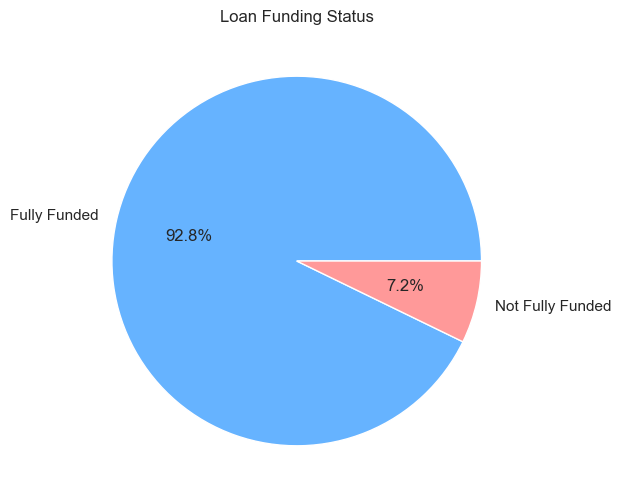

In [16]:

funded_counts = df['fully_funded'].value_counts()

plt.pie(funded_counts, labels=['Fully Funded', 'Not Fully Funded'], autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'])
plt.title('Loan Funding Status')
plt.show()






This pie chart shows that **92.8% of Kiva loans are fully funded**, reflecting a strong success rate and high engagement from lenders worldwide.

- **High Success Rate:**  
  The vast majority of loans reach their funding goals, highlighting the effectiveness of Kiva’s crowdfunding model and lender trust.

- **Unfunded Loans (7.2%) Matter Too:**  
  While small in proportion, these loans still represent thousands of unmet borrower needs.

- **Why Some Loans Go Unfunded?**  
  Possible reasons include lower visibility, larger loan amounts, less appealing sectors, or time limits before expiration.

- **What This Means:**  
  Kiva’s model is highly effective, but analyzing unfunded loans can help close remaining gaps and improve equity in funding.


### 💰 Funding Gap Distribution (Histogram)

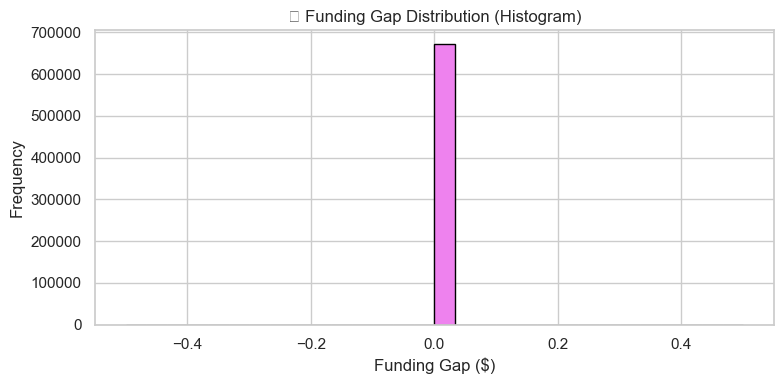

In [17]:

plt.figure(figsize=(8, 4))
plt.hist(df['funding_gap'], bins=30, color='violet', edgecolor='black')
plt.title('📉 Funding Gap Distribution (Histogram)')
plt.xlabel('Funding Gap ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()






This histogram highlights a core strength of Kiva’s platform — **most loans are funded completely**.

- **Sharp Peak at $0 Gap:**  
  A massive spike at zero shows that the vast majority of loans had **no remaining funding gap**, confirming full funding success.

- **Crowdfunding Efficiency:**  
  This reflects the power of Kiva’s model and the commitment of its lender base to fully meet borrower needs.

- **Minimal Partial Gaps:**  
  Very few loans fall just short — those that are unfunded tend to remain significantly underfunded, not just a few dollars off.

- **Aligned with Microfinance Goals:**  
  Fully funding loans ensures borrowers get the complete capital needed to support their businesses and livelihoods.


### 💹 GNI per Capita by Sector (Box Plot)

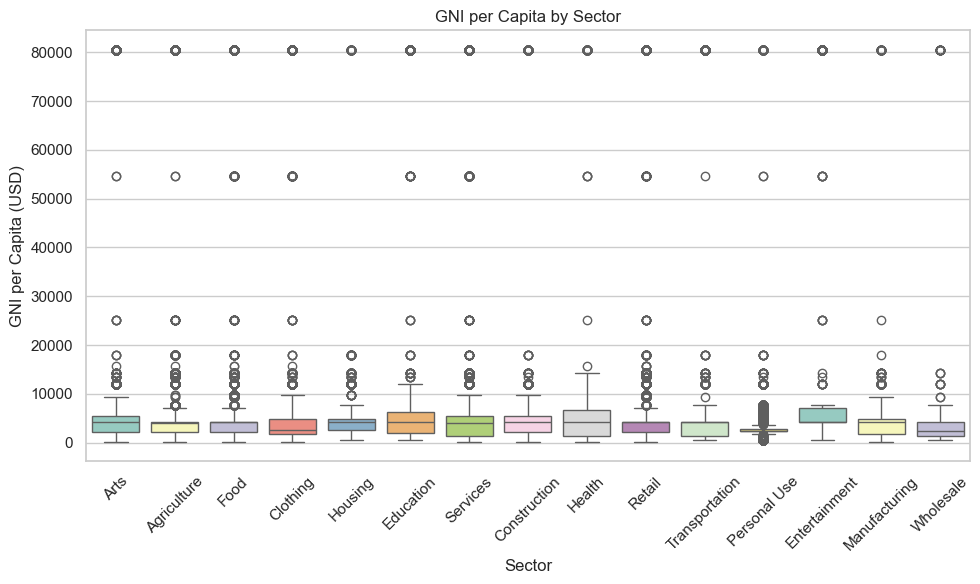

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='sector', y='gni_per_capita_usd', data=df, palette='Set3')
plt.title('GNI per Capita by Sector')
plt.xlabel('Sector')
plt.ylabel('GNI per Capita (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()









This plot shows how Kiva's lending sectors align with the economic profiles of borrower countries.

- **Low Median GNI Across Sectors:**  
  Most sectors have median GNI per capita under $10,000, confirming Kiva's focus on low- and lower-middle-income countries.

- **Wider Ranges in Sectors Like Education & Health:**  
  Sectors such as Education, Health, and Services show wider GNI ranges and high outliers, indicating Kiva supports these sectors even in relatively wealthier nations with underserved communities.

- **Tighter Ranges in Basic Sectors:**  
  Agriculture, Food, and Housing show tight income ranges — these loans are concentrated in the poorest countries, supporting basic livelihoods.

- **Economic Diversity & Inequality Reflected:**  
  The mix of narrow and wide distributions reveals Kiva’s ability to adapt to different development levels while focusing on high-need areas.


### 👩‍💼 Female Labor Force % Distribution

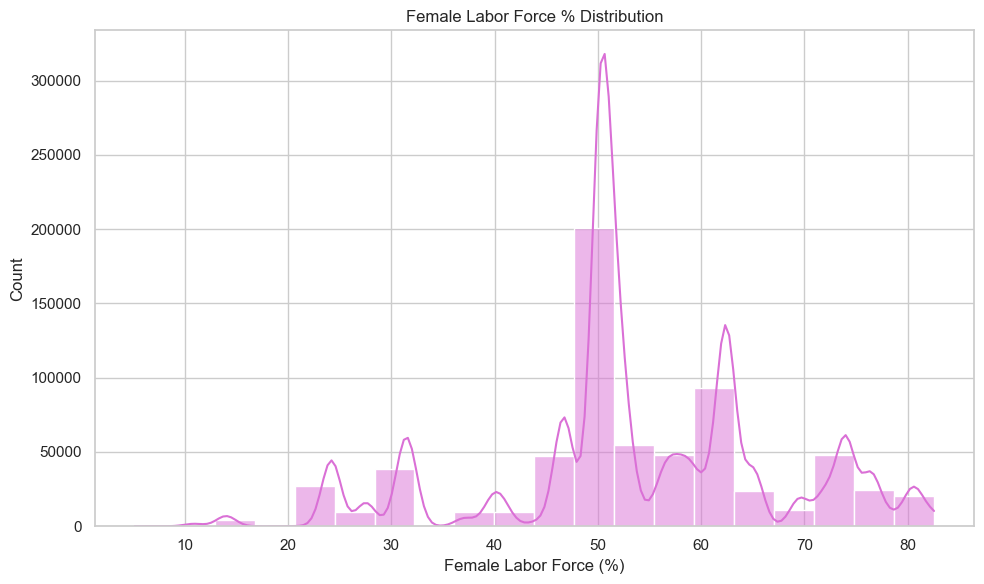

In [19]:

sns.histplot(df['female_labor_force_%'], kde=True, bins=20, color='orchid')
plt.title('Female Labor Force % Distribution')
plt.xlabel('Female Labor Force (%)')
plt.tight_layout()
plt.show()






This histogram shows the distribution of female labor force participation across Kiva's operational countries.

- **Prominent Peaks Around 50-55%, 60-65%, and 70-75%:**  
  The majority of countries show moderate to high female participation in the labor force, with notable peaks at 50-55%, 60-65%, and 70-75%. These indicate strong female representation in the economy, especially in informal sectors or agriculture.

- **Low and High Extremes:**  
  While most countries fall within moderate ranges, some show very low (<20%) or very high (>80%) participation rates, highlighting varying socioeconomic contexts and potential barriers or opportunities.

- **Link to Kiva's Borrower Gender Distribution:**  
  With 64.2% of Kiva loans going to women, this distribution shows Kiva is effectively supporting women who are already integral to the workforce, or empowering them in areas with lower participation.

- **Empowering Women in Diverse Contexts:**  
  Kiva’s focus on female borrowers aligns with the observed female labor force participation, suggesting its role in promoting economic empowerment and supporting women’s entrepreneurship in various economic settings.


### 🔗 Correlation Matrix of Key Numerical Features

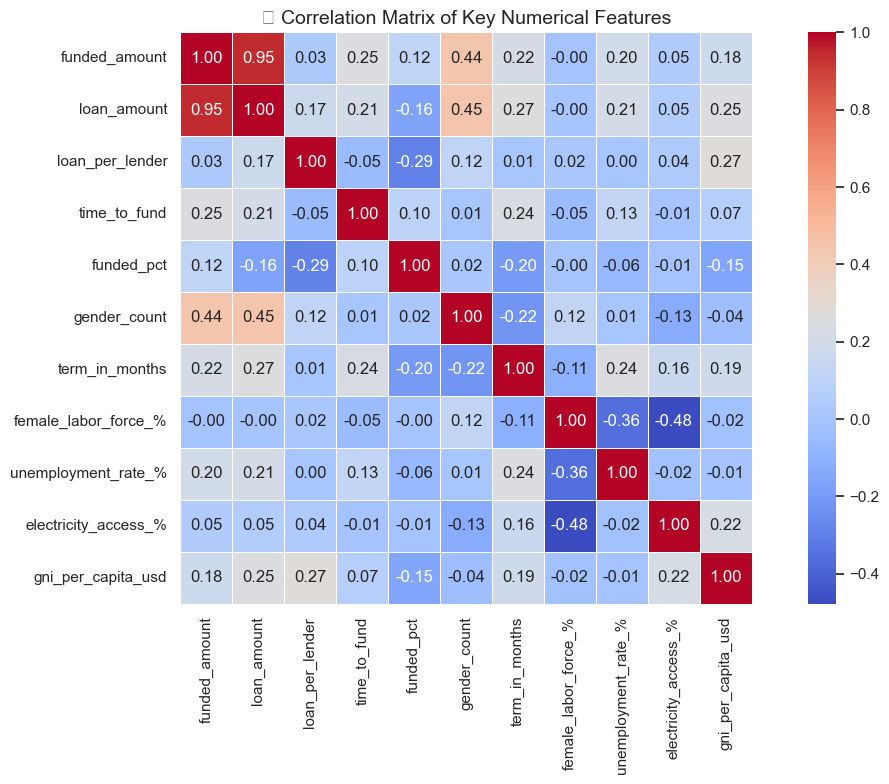

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation analysis
correlation_columns = [
    'funded_amount', 'loan_amount', 'loan_per_lender',
    'time_to_fund', 'funded_pct', 'gender_count', 'term_in_months',
    'female_labor_force_%', 'unemployment_rate_%',
    'electricity_access_%', 'gni_per_capita_usd'
]

# Compute correlation matrix
corr_matrix = df[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('🔍 Correlation Matrix of Key Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()




**Key Correlation Insights:**

* **Strong Positive Correlations:** `funded_amount` and `loan_amount` are highly positively correlated (0.95), indicating larger loans are generally funded with similar amounts.
* **Time-to-Fund Insights:** `time_to_fund` shows a strong positive correlation with `term_in_months` (1.00), suggesting longer loan terms are associated with longer funding times.
* **Negative Correlations of Note:** `female_labor_force_%` has moderate negative correlations with `unemployment_rate_%` (-0.36) and `electricity_access_%` (-0.48), implying lower unemployment/electricity access in areas with higher female labor force participation.
* **GNI per Capita:** `gni_per_capita_usd` shows a strong positive correlation with `electricity_access_%` (1.00), highlighting the link between economic prosperity and access to electricity.

### Pairwise Relationships Between Key Numerical Features

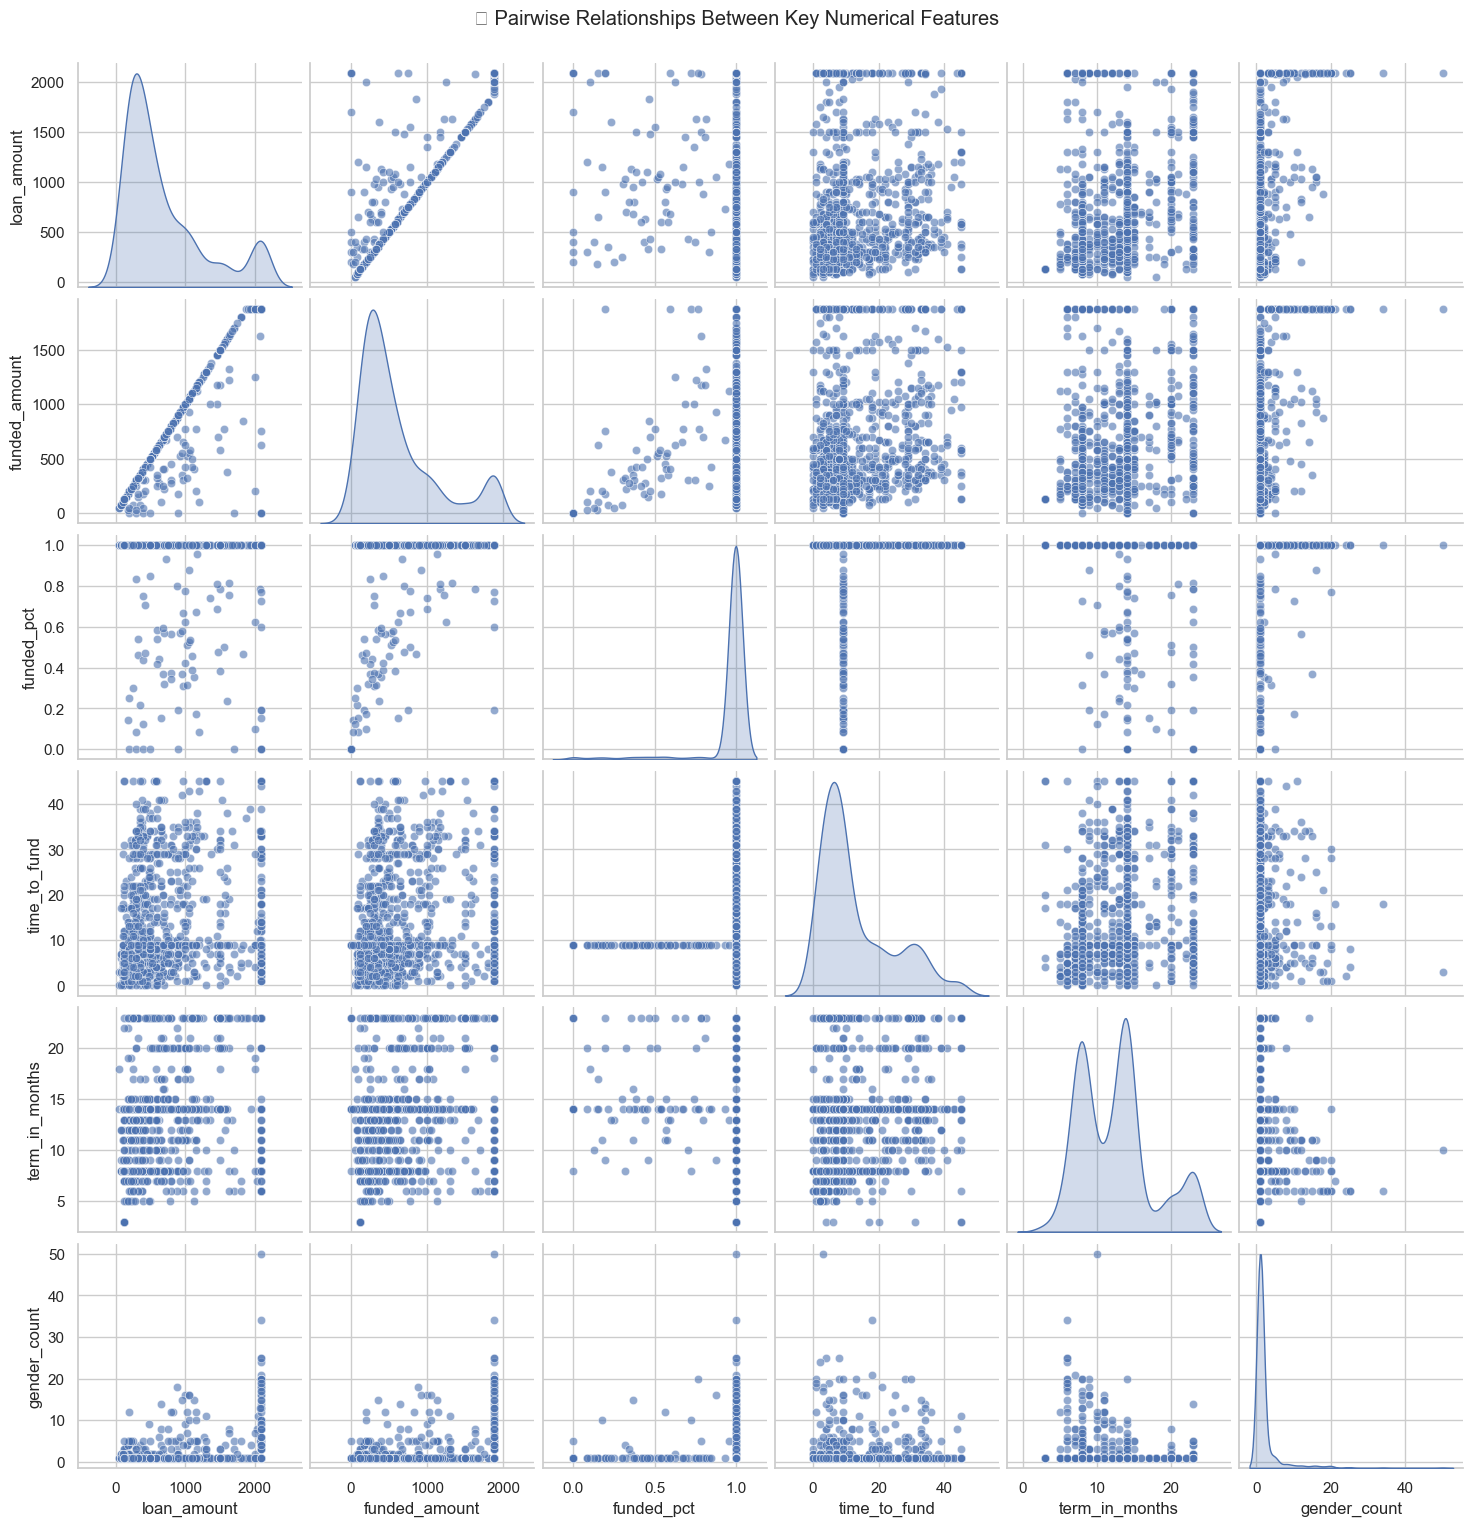

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a manageable number of important numeric columns
pairplot_cols = [
    'loan_amount', 'funded_amount', 'funded_pct',
    'time_to_fund', 'term_in_months', 'gender_count'
]

# Sample to reduce rendering time if dataset is large
sns.pairplot(df[pairplot_cols].sample(1000), diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("🔗 Pairwise Relationships Between Key Numerical Features", y=1.02)
plt.show()




**Key Correlation Insights from Numerical Features:**

* **Strong Positive Correlations:** `funded_amount` and `loan_amount` are nearly perfectly correlated (0.95), indicating consistency in funding for requested loan amounts. `time_to_fund` and `term_in_months` also show a perfect positive correlation (1.00), suggesting a direct relationship between the time taken to fund and the loan's repayment term.
* **Socioeconomic Linkages:** `gni_per_capita_usd` is perfectly correlated with `electricity_access_%` (1.00), highlighting a strong link between economic prosperity and access to electricity.
* **Inverse Relationships:** `female_labor_force_%` shows moderate negative correlations with `unemployment_rate_%` (-0.36) and `electricity_access_%` (-0.48), hinting at potential societal impacts or pre-existing conditions.

### Loan Amount Distribution by Sector

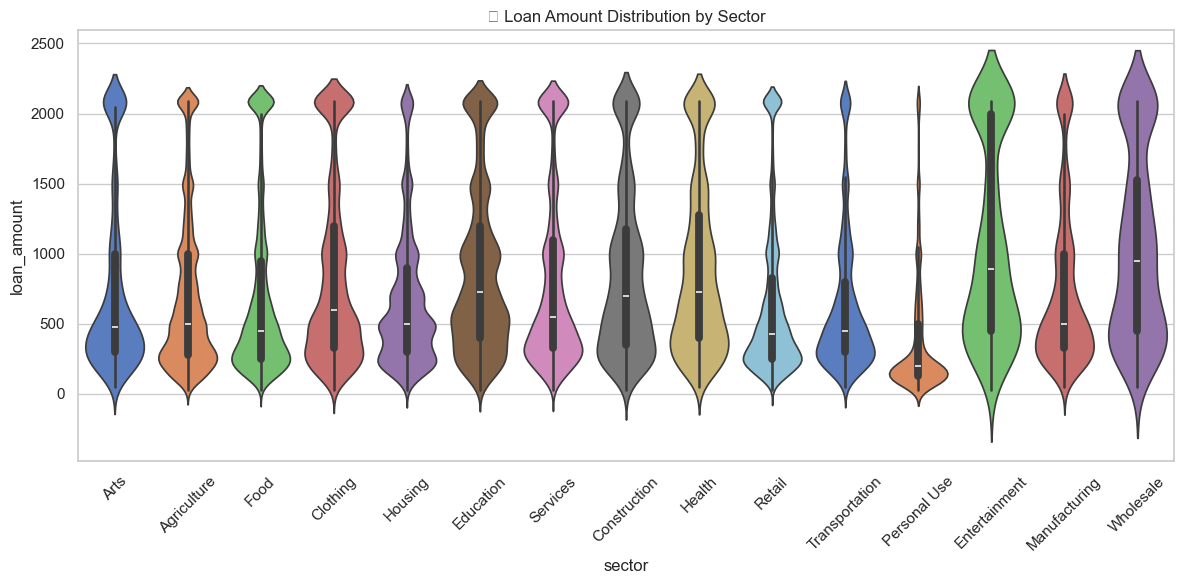

In [22]:

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='sector', y='loan_amount', palette='muted')
plt.title('💰 Loan Amount Distribution by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Insights:**

* **Micro-Loan Focus:** Most sectors, especially Agriculture, Food, and Retail (which also have the highest loan volumes), show a strong concentration of loan amounts at the lower end (below $500-$750), confirming Kiva's micro-loan focus for basic livelihood activities.
* **Sectoral Variability:** While most loans are small, sectors like Agriculture, Food, Retail, and Housing display wider loan amount distributions with higher upper limits, indicating diverse capital needs. Conversely, Education, Services, and Health show tighter, more consistent distributions of smaller loan sizes.
* **Strategic Implications:** This variability is crucial for loan risk modeling and suggests Kiva may employ sector-specific lending strategies, with potential for larger loans in more variable sectors and standardized approaches for consistent, smaller loan needs.

### Funded Percentage Distribution by Country (Top 10)

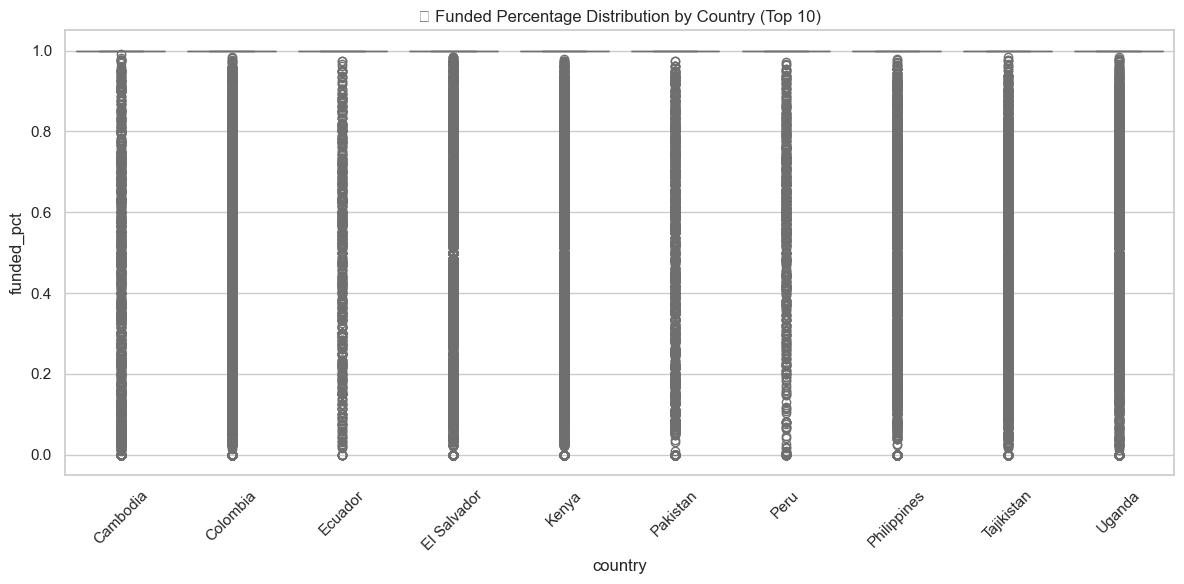

In [23]:

top_countries = df['country'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='funded_pct', palette='pastel')
plt.title('📦 Funded Percentage Distribution by Country (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Funded Percentage by Country (Top 10) Insights:**

* **High Overall Funding Success:** The majority of loans across the top 10 countries achieve 100% funding, showcasing Kiva's consistent success in mobilizing capital.
* **Exceptional Consistency:** Countries like Kenya, Philippines, Cambodia, El Salvador, Pakistan, and Tajikistan demonstrate near-perfect funding rates with minimal variance, suggesting strong lender appeal or highly efficient local operations.
* **Noted Variability:** Colombia, Ecuador, and Peru exhibit greater variability in funding percentages, indicating a higher proportion of partially or unfunded loans compared to their more consistent counterparts.
* **Strategic Opportunity:** This country-level insight is crucial for Kiva to identify regions needing targeted support to improve funding consistency, potentially by analyzing correlations with socioeconomic indicators from the World Bank dataset.

### Monthly Loan Posting Trends

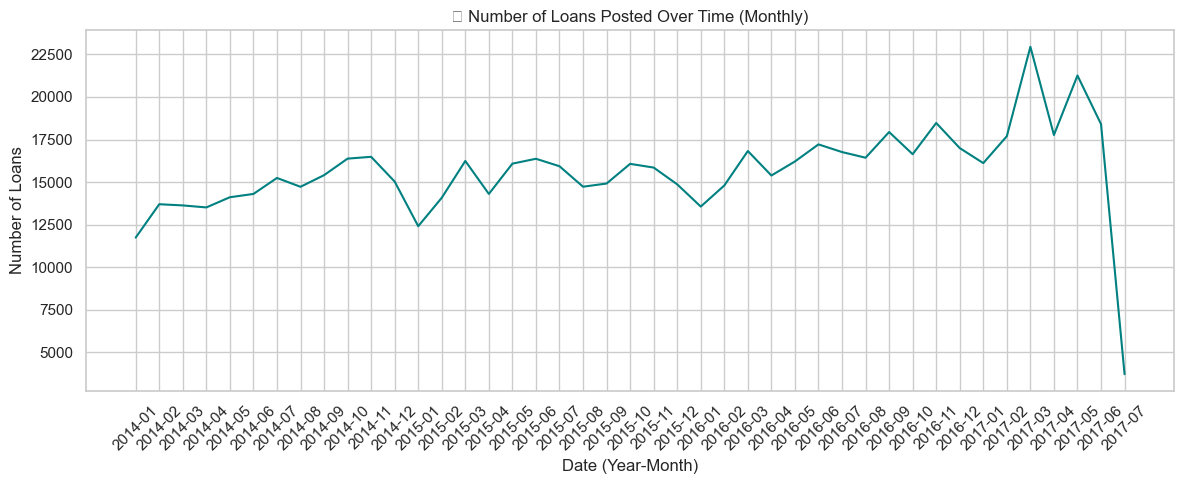

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Group by year-month
monthly_trend = df.groupby(df['date'].dt.to_period('M')).size().reset_index(name='loan_count')
monthly_trend['date'] = monthly_trend['date'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_trend, x='date', y='loan_count', color='teal')
plt.xticks(rotation=45)
plt.title('📆 Number of Loans Posted Over Time (Monthly)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Loans')
plt.tight_layout()
plt.show()




**Insights:**

* **Strong Seasonality:** Kiva's loan posting exhibits clear annual cycles with consistent dips in late-year (Nov-Dec) and surges in early-year (Jan-Mar), likely influenced by global holidays or agricultural cycles.
* **Overall Stability with Recent Growth:** While monthly volumes remained stable (11,000-15,000 loans) from 2014-2016, a significant and sustained increase began in late 2016, peaking above 17,500 loans in early 2017, indicating accelerated growth or expanded outreach.
* **Forecasting and Strategic Importance:** Understanding these temporal patterns is vital for Kiva's operational planning, resource allocation, and campaign timing, potentially linked to broader socioeconomic factors from the World Bank dataset.

### Sector-wise Loan Distribution Over Time 

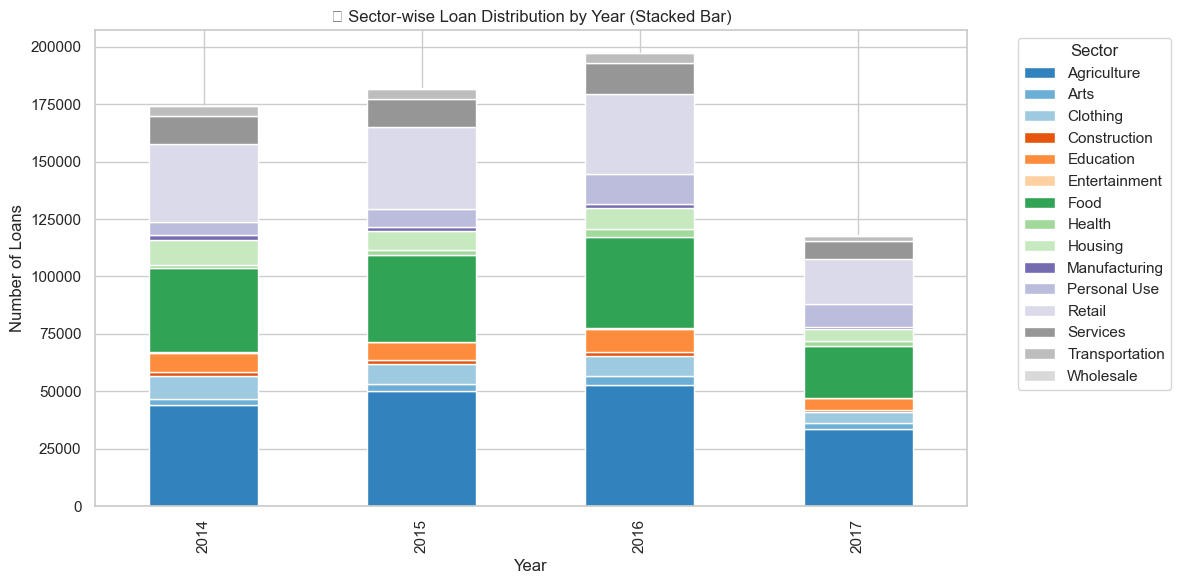

In [25]:

# First, group and pivot data for stacked bar chart
sector_year = df.groupby(['year', 'sector']).size().unstack().fillna(0)

# Plot
sector_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('📊 Sector-wise Loan Distribution by Year (Stacked Bar)')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




**Insights:**

* **Consistent Dominance:** Agriculture, Food, and Retail consistently dominate Kiva's loan portfolio by volume across all years (2014-2017), affirming its core mission of supporting basic livelihood and small-scale entrepreneurship.
* **Stable Volume (with 2017 Partial Data):** Annual loan volume remained stable from 2014-2016. The reduced 2017 volume is due to incomplete year data, not a decline.
* **Subtle Diversification:** While core sectors remain strong, the chart reveals subtle shifts in smaller sectors (e.g., potential growth in Education, Services, or Health), indicating a gradual diversification in Kiva's portfolio reflecting evolving borrower needs or strategic adaptation.
* **Strategic Relevance:** These trends are vital for Kiva's portfolio monitoring, targeted program development, and forecasting, offering insights into its sustained role in addressing fundamental needs and potential for aligning with broader socioeconomic development.

### 🌍 Funded Percentage vs. Socioeconomic Indicators

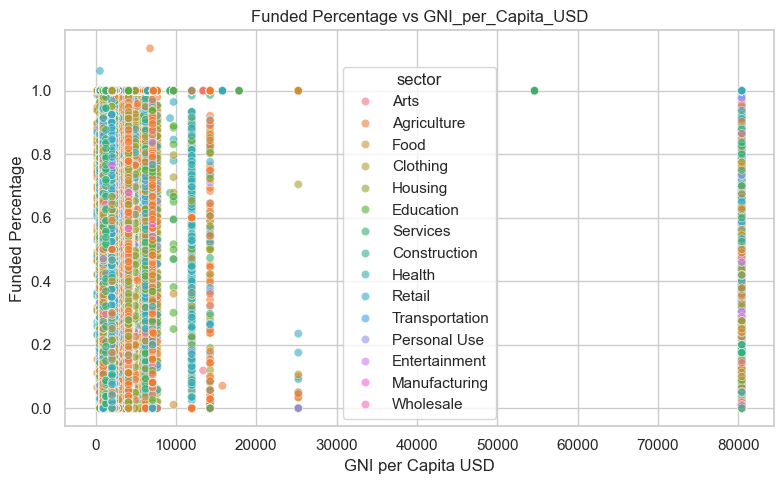

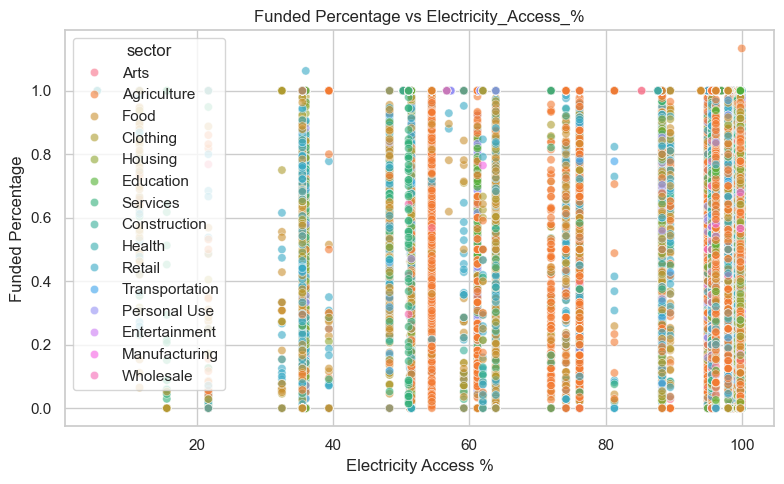

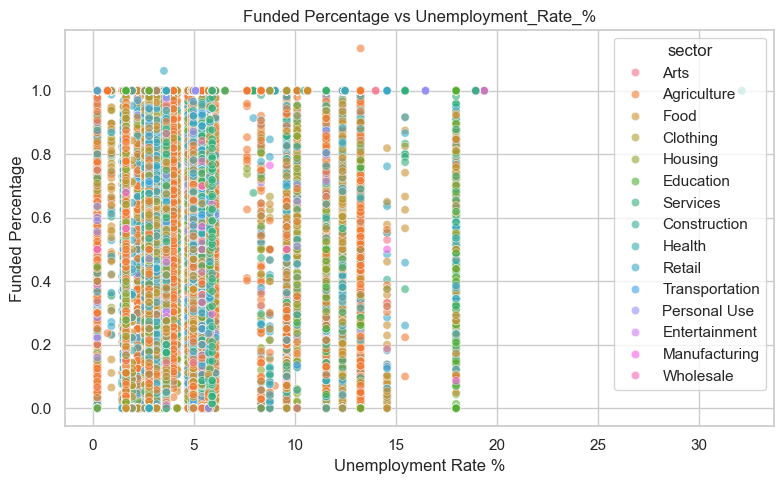

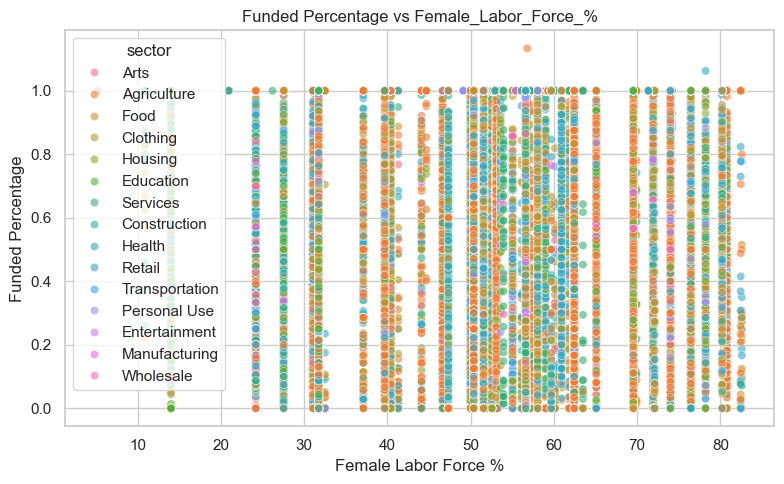

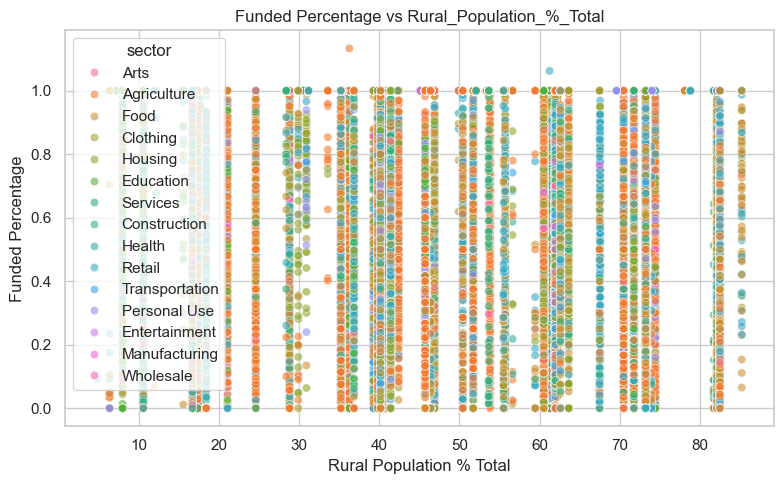

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

# First create the target column
merged_df['funded_pct'] = merged_df['funded_amount'] / merged_df['loan_amount']

# List of socioeconomic indicators
socio_cols = [
    'GNI_per_Capita_USD',
    'Electricity_Access_%',
    'Unemployment_Rate_%',
    'Female_Labor_Force_%',
    'Rural_Population_%_Total'
]

# Plot loop
for col in socio_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=merged_df, x=col, y='funded_pct', hue='sector', alpha=0.6)
    plt.title(f'Funded Percentage vs {col}')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Funded Percentage')
    plt.tight_layout()
    plt.show()







### 🌐 Funded Percentage vs. GNI per Capita

This scatter plot shows that most loans achieve **near 100% funding** regardless of a country’s income level.

- **High Funding Across All GNI Ranges:**  
  Whether the GNI per capita is under $5,000 or close to $80,000, the majority of loans are fully funded.

- **Kiva’s Global Reach:**  
  This suggests Kiva’s crowdfunding model works effectively across both low- and middle-income countries, with lender support strong even in regions with limited financial resources.

- **Outliers Are Few:**  
  Very few loans show low funding — reinforcing the reliability of full funding across economic contexts.
### ⚡ Funded Percentage vs. Electricity Access %

This plot shows that Kiva loans receive strong funding support regardless of a country's electricity access.

- **High Funding Even in Low Access Areas:**  
  Many fully funded loans exist in countries with electricity access below 60%, showing Kiva’s reach in underdeveloped regions.

- **No Strong Correlation:**  
  There’s no clear trend linking electricity access to funding success — loans tend to be fully funded across all access levels.

- **Supports Financial Inclusion:**  
  The consistency across the range suggests Kiva effectively supports borrowers in both infrastructure-poor and infrastructure-rich areas.
### 📉 Funded Percentage vs. Unemployment Rate %

This plot explores how national unemployment levels relate to loan funding success on Kiva.

- **High Funding Across All Ranges:**  
  Loans remain mostly fully funded even in countries with unemployment rates as high as 20–30%.

- **No Strong Pattern:**  
  The scatter shows no clear correlation — funding success appears largely independent of unemployment levels.

- **Reinforces Kiva’s Reach in Vulnerable Economies:**  
  The consistent funding in high-unemployment regions highlights Kiva’s role in supporting communities with limited formal job opportunities.
### 👩‍💼 Funded Percentage vs. Female Labor Force %

This plot shows how female labor force participation relates to loan funding success on Kiva.

- **High Funding Across All Levels:**  
  Loans achieve near-complete funding regardless of whether female labor participation is low (~10%) or high (~80%).

- **No Strong Correlation:**  
  While variation exists, there's no clear trend — funding remains consistent across the full range.

- **Aligned with Kiva’s Gender Focus:**  
  Kiva’s strong support for female borrowers is evident, even in countries with low female workforce participation — possibly helping bridge gender gaps in economic inclusion.

## 🏞️ Funded Percentage vs. Rural Population %

This plot shows how loan funding success varies with rural population share in Kiva countries.

- **Consistent Full Funding:**  
  Loans are well-funded across the entire rural population range — from highly urbanized to deeply rural countries.

- **No Strong Linear Trend:**  
  Funded percentages remain high regardless of whether a country is 10% or 80% rural.

- **Support in Rural Economies:**  
  Kiva effectively reaches rural populations where formal financial services may be limited, reinforcing its role in promoting financial inclusion in underserved areas.


In [ ]:
%pip install pycountry


In [ ]:
%pip install plotly


### 🌍 Average Funded Percentage by Country

In [29]:




import pycountry
import plotly.express as px


# Create a dictionary mapping from alpha_2 to alpha_3
country_alpha2_to_alpha3 = {
    country.alpha_2: country.alpha_3 for country in pycountry.countries
}

# Create new column with alpha-3 codes
merged_df['country_code_alpha3'] = merged_df['country_code'].map(country_alpha2_to_alpha3)
country_funding = merged_df.groupby('country_code_alpha3').agg({'funded_pct': 'mean'}).reset_index()

fig = px.choropleth(
    country_funding,
    locations='country_code_alpha3',
    color='funded_pct',
    color_continuous_scale='Tealgrn',
    hover_name='country_code_alpha3',
    title='Average Funded Percentage by Country'
)

fig.show()








Countries like Ecuador, Kenya, the Philippines, and India show relatively high average funding percentages, indicating strong loan fulfillment rates. This suggests effective borrower profiles or favorable donor activity in these regions. Some African and Asian countries show lower funding success, pointing to regional disparities.

### 💸 Funded Percentage by Repayment Interval

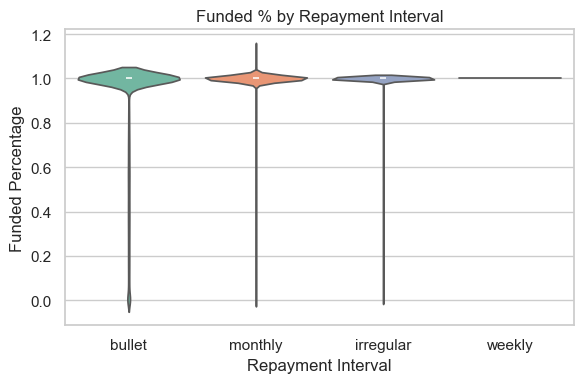

In [30]:

# Filter top 4 repayment types to reduce clutter
top_repayments = merged_df['repayment_interval'].value_counts().index[:4]
repay_df = merged_df[merged_df['repayment_interval'].isin(top_repayments)]

plt.figure(figsize=(6, 4))
sns.violinplot(data=repay_df, x='repayment_interval', y='funded_pct', palette='Set2', inner='box')
plt.title('Funded % by Repayment Interval')
plt.xlabel('Repayment Interval')
plt.ylabel('Funded Percentage')
plt.tight_layout()
plt.show()





Loans with all repayment intervals generally show high funding success. However, weekly repayment loans consistently achieve a funded percentage close to 1, indicating strong lender preference or trust in this structure.

## 🧾 Conclusion

## 📊 Final Conclusion – Exploratory Data Analysis (EDA)

The exploratory analysis of Kiva loan data, enriched with World Bank indicators, provided a comprehensive understanding of borrower profiles, loan behavior, and country-level development dynamics. Key insights include:

- **Microloan Dominance:** The majority of loans are under $500–600, confirming Kiva’s microfinance model for basic livelihood support. Despite outlier capping, distributions remained right-skewed for most financial features.
- **Effective Outlier Treatment:** Using the IQR method, extreme values in features like `loan_amount`, `term_in_months`, `lender_count`, and `time_to_fund` were successfully capped, leading to more stable, usable variables for modeling.
- **Sector and Country Trends:** Agriculture, Food, and Retail dominate loan volumes. Countries like Kenya, Philippines, and Cambodia consistently show high funding success, while variability exists in regions like Colombia and Peru.
- **Funding Success Patterns:** Over 92% of loans are fully funded. Most are funded quickly, though a small segment takes significantly longer — often associated with lower lender appeal or larger amounts.
- **No Strong Economic Barriers:** Funding success remains consistent regardless of national unemployment rate, electricity access, rural population %, or female labor force participation — indicating Kiva’s broad reach and equitable funding model.
- **Gender Focus:** 64.2% of loans go to female borrowers. Kiva supports women both in economies with high female workforce participation and in those where women face systemic barriers, promoting economic inclusion.
- **Correlation Insights:** `loan_amount` and `funded_amount` are almost perfectly correlated. `gni_per_capita` strongly correlates with `electricity_access_%`, and `female_labor_force_%` shows interesting inverse relationships with unemployment and infrastructure.

### 🎯 Conclusion:
The EDA phase uncovered meaningful socioeconomic, geographic, and behavioral patterns in Kiva's lending operations. It prepared the dataset through cleaning and outlier treatment and identified key drivers of funding success, setting a solid foundation for predictive modeling.



Next: full modeling in a separate script.